In [5]:
import pickle
import random
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

with open("train_dataset.pickle", "rb") as f:
    train_data = pickle.load(f)
with open("test_dataset.pickle", "rb") as f:
    test_data = pickle.load(f)

In [6]:
random.shuffle(train_data)
train_data_subsets = [train_data[i:i+40] for i in range(0, len(train_data), 40)]

X_test = test_data[:,:-1]
y_test = test_data[:,-1]

In [7]:
biases = []
variances = []
mses = []
irr_errors = []

for index in range(1, 16, 1):
    polymodels = []
    X_test_poly = []
    for i in range(20):
        X_train = train_data_subsets[i][:,:-1]
        y_train = train_data_subsets[i][:, -1]
        polymodel = PolynomialFeatures(degree=index)
        X_train_poly = polymodel.fit_transform(X_train)
        test_poly = polymodel.transform(X_test)
        X_test_poly.append(test_poly)
        model = LinearRegression()
        model.fit(X_train_poly, y_train)
        polymodels.append(model)

    y_predict = []
    for i in range(20):
        y = polymodels[i].predict(X_test_poly[i])
        y_predict.append(y)
    y_mean_predict = np.mean(y_predict, axis=0)

    bias = 0
    variance = 0
    mse = 0
    irr_error = 0
    for i in range(200):
        biastemp = abs(y_mean_predict[i] - y_test[i])
        bias += biastemp
        
        vartemp = 0
        msetemp = 0
        for j in range(20):
            vartemp += (y_predict[j][i] - y_mean_predict[i])**2
            msetemp += (y_predict[j][i] - y_test[i])**2
            
        vartemp /= 20
        variance += vartemp
        
        msetemp /= 20
        mse += msetemp
        
        irr_error += (msetemp - biastemp**2 - vartemp)
       
    irr_error /= 200
    irr_errors.append(irr_error)
        
    bias /= 200
    biases.append(bias)

    variance /= 200
    variances.append(variance)
    
    mse /= 200
    mses.append(mse)
    

In [8]:
headers = ["Degree", "Bias", "Variance"]
table = ""
table += "{:<6} {:<22} {:<22}\n".format(headers[0], headers[1], headers[2])
for i in range(15):
    table += "{:<6} {:<22} {:<22}\n".format(i+1, biases[i], variances[i])

print(table)

Degree Bias                   Variance              
1      0.26999262221246456    0.008444314219278637  
2      0.08774507560973892    0.0013354779352470613 
3      0.03511564457381851    0.0007032936406839511 
4      0.028232024121172882   0.000716208978255261  
5      0.02719110507863312    0.0007830672182578932 
6      0.026652858844155043   0.0009855270512897597 
7      0.026944519017645562   0.0011027244297483146 
8      0.02939662202848952    0.0018247844500191353 
9      0.03136553011004451    0.003493262228960602  
10     0.029321177048053988   0.004729993009239088  
11     0.038083575013721255   0.04440395359829535   
12     0.04779623011478025    0.13059402351032737   
13     0.06629985530181938    0.39875331328454167   
14     0.09983215983514528    1.2737505105059186    
15     0.2341315656335969     46.93656018544497     



In [9]:
headers = ["Degree", "Irreducible Error"]
table = ""
table += "{:<6} {:<22}\n".format(headers[0], headers[1])
for i in range(15):
    table += "{:<6} {:<22}\n".format(i+1, irr_errors[i])

print(table)

Degree Irreducible Error     
1      -1.6065707791890205e-17
2      1.0807056204792386e-17
3      -4.287341965822367e-18
4      -3.139849491518021e-18
5      3.943514351872901e-18 
6      1.5516288340983175e-18
7      2.3131453349978238e-18
8      5.540273101400928e-18 
9      3.8228968601838884e-18
10     -5.704800781075603e-18
11     -4.7943420067309005e-18
12     -5.4447277849506426e-18
13     4.38254846909375e-17  
14     -9.412826421084652e-17
15     6.494090746926584e-15 



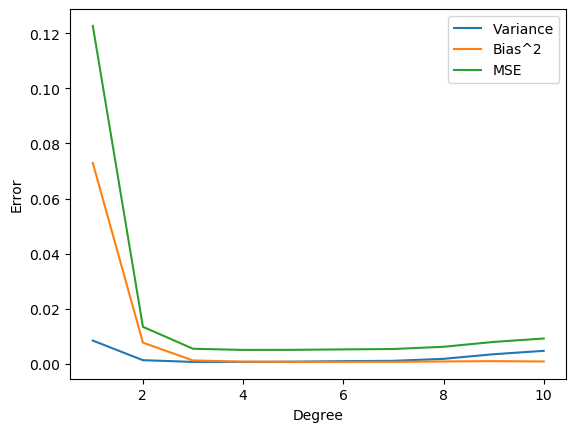

In [10]:
biases2 = []
varplot = []
mseplot = []
for i in range(10):
    temp = variances[i]
    varplot.append(temp)
    temp = mses[i]
    mseplot.append(temp)
    bias2 = biases[i]*biases[i]
    biases2.append(bias2)

plt.plot(range(1, 11, 1), varplot, label="Variance")
plt.plot(range(1, 11, 1), biases2, label="Bias^2")
plt.plot(range(1, 11, 1), mseplot, label="MSE")
plt.ylabel('Error')
plt.xlabel('Degree')
plt.legend()
plt.show()